# Ön Bilgi
**Geliştiren :** Onur Kantar - Ömer Resul Ertan

**Veri Kümesi Adı :** Hürriyet

**Veri Kümesinin İçeriği :** 6 farklı sınıfa ait toplamda 6000 haber.

**Algoritma :** Naive Bayes (NB)

**Doğruluk Oranı :** ~%73


---



In [ ]:
import pandas as pd                     
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Sets/hurriyet.csv", sep=';', encoding="ISO-8859–9")
df = df.drop(['ItemID'], axis=1)
df

,Sentiment,SentimentText
0,1,abd deki türk mağazasına soygun girişimi abd ...
1,1,ajanlar ünlü yazarı bile şaşırttı yazdığı ca...
2,1,mel gibson ın şok eden ses kaydı mel gibson ı...
3,1,türkiye avrupa hedefini teyit etti italya n...
4,1,100 yıllık doğalgaz rezervi bulundu haaretz g...
...,...,...
5995,6,kadıköy adliyesi nin emektarlarına plaket kad...
5996,6,tümörü alındı ikizine kavuştu ebrar ve eslem ...
5997,6,tasarı kabul edildi elektronik tebligat dönem...
5998,6,yaşlı kadının acı sonu gültepe yaşar kemal ma...


# Veri Kümemizi Düzenleyelim : 

---



### NULL Değerleri Silme İşlemi

In [ ]:
df.isnull().sum()

Sentiment        0
SentimentText    0
dtype: int64

In [ ]:
# NULL Değer Bulunmuyor.
# df = df.dropna().reset_index(drop=True)
# df.isnull().sum()

### Gereksiz Verileri Kaldıralım

In [ ]:
nltk.download('stopwords')
stop_word_list = stopwords.words('turkish')
stop_word_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [ ]:
def preprocess_text(sen):
    
    # URL Silme İşlemi
    sentence = re.sub(r'http\S+', '', str(sen))

    # E-Mail Adresi Silme İşlemi
    sentence = re.sub('\S+@\S+', '', str(sentence))

    # Sayıları Silme İşlemi
    sentence = re.sub('[\d\s]', ' ', str(sentence))

    # Noktalama İşaretlerini Silme İşlemi
    sentence = re.sub('[^\w\s]', ' ', str(sentence))
    
    # Tek Karakterleri Silme İşlemi
    sentence = re.sub(r"\b[\w\s]\b", ' ',str(sentence))
    
    # Birden Çok Boşluğu Silme İşlemi
    sentence = re.sub(r'\s+', ' ', sentence)
        
    # Engellenecek Kelimeleri Silme İşlemi
    WPT = nltk.WordPunctTokenizer()
    tokens = WPT.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in stop_word_list]
    single_doc = ' '.join(filtered_tokens)
    
    # Tüm Harfler Küçük Harfe Dönüştürülüyor
    return single_doc.lower()

In [ ]:
x = df['SentimentText']
y = df['Sentiment']

In [ ]:
x = x.apply(preprocess_text)
pd.DataFrame(x)

,SentimentText
0,abd deki türk mağazasına soygun girişimi abd n...
1,ajanlar ünlü yazarı bile şaşırttı yazdığı casu...
2,mel gibson ın şok eden ses kaydı mel gibson ın...
3,türkiye avrupa hedefini teyit etti italya nın ...
4,yıllık doğalgaz rezervi bulundu haaretz gazete...
...,...
5995,kadıköy adliyesi nin emektarlarına plaket kadı...
5996,tümörü alındı ikizine kavuştu ebrar eslem adlı...
5997,tasarı kabul edildi elektronik tebligat dönemi...
5998,yaşlı kadının acı sonu gültepe yaşar kemal mah...


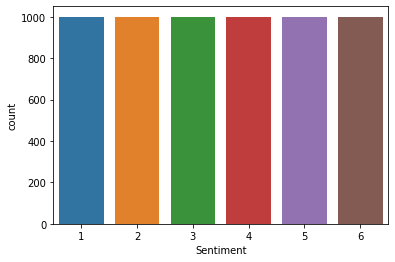

In [ ]:
sns.countplot(y)

# Y Verilerimizi Düzenleyelim :  


---

## Label Encoding Uygulayalım  

**Label Encoding Nedir?**

Veri kümesindeki dize türünün kategorik verilerini modelin anlayabileceği sayısal değerlere dönüştürmek için yapılır.


In [ ]:
pd.DataFrame(y).sample(5)

,Sentiment
2072,3
1174,2
894,1
1413,2
4903,5


In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y).sample(5)

,0
3618,3
2587,2
2702,2
405,0
1267,1


# Train ve Test İşlemleri İçin Ayrımı Gerçekleştirelim : 

---


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print('x Train : ' + str(x_train.shape))
print('x Test : ' + str(x_test.shape))
print('y Train : ' + str(y_train.shape))
print('y Test : ' + str(y_test.shape))

x Train : (4800,)
x Test : (1200,)
y Train : (4800,)
y Test : (1200,)


# X Verilerimizi Vektörlere Dönüştürelim (Bag Of Words) : 

---


In [ ]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
features = vectorizer.get_feature_names()
BoW_Matrix = x_train.toarray()
BoW_df = pd.DataFrame(BoW_Matrix, columns = features)
BoW_df.head()

,aa,aaa,aaaah,aah,aalborg,aaron,ab,aba,abank,abant,abartacak,abartarak,abartmayın,abarttığını,abartı,abartılacak,abartıldığını,abartılmadığını,abartılmış,abartılı,abartıyoruz,abay,abayı,abbas,abbasi,abbasiye,abbey,abc,abd,abdal,abdalata,abdellaoue,abdestimden,abdi,abdil,abdul,abdulaye,abdulaziz,abdulhamit,abdulkader,...,şüphelenmeli,şüphelenmem,şüpheler,şüpheleri,şüphelerimiz,şüphelerin,şüpheli,şüpheliden,şüpheliler,şüphelilerden,şüphelilere,şüphelileri,şüphelilerin,şüphelinin,şüpheliye,şüpheliyi,şüpheliyim,şüphem,şüphemiz,şüphesi,şüphesinden,şüphesine,şüphesiyle,şüphesiz,şüphesizdir,şüpheyle,şüyün,şıhuang,şık,şıklık,şıkır,şımarttılar,şımarık,şırnak,şırnaklı,şırınga,şırıngada,şırınganın,şırıngayla,şırıngayı
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Eğitime Başlayalım :

---


In [ ]:
model = GaussianNB()

model.fit(x_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print('Accuracy = ' + str(accuracy_score(y_test, model.predict(x_test.toarray()))))

Accuracy = 0.7375


# Sonuçları Değerlendirelim : 

---


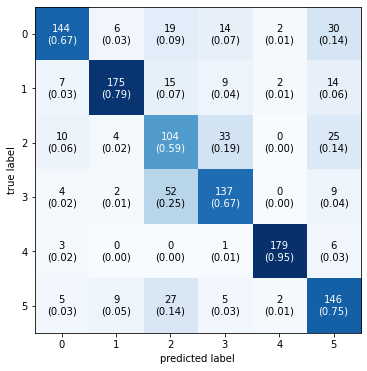

In [ ]:
y_pred = model.predict(x_test.toarray())

cm = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = cm,
                                show_normed = True,
                                figsize = (6,6))